# Human bone metastasis scRNA-seq analysis
This notebook generates major results in Figures 7, and S7

In [1]:
# Load package
suppressWarnings(suppressPackageStartupMessages({
    library(Seurat)
    library(ggplot2)
    }))

In [2]:
# Color code
mycolors <- c("#418abd","#ADC6E6","#956ABE","#C5B1D6","#F97F10", "#FBBE7F",
              "#2FA12E","#98DF89","#34BECF","#A2DBE5","#E67D7E","#FBC1C2",
              "#BDBC23","#BA9994","#DCC3BF","#E276C2","#F7B8D3","#8E8E8E",
              "#C7C7C7","#e3c702","#fee84d", "#E9E9BA")

# Fig size setting
fig_size <- function (height, width) {
    options(repr.plot.height = height, repr.plot.width = width)
}

In [3]:
# Load data from doi: https://doi.org/10.1101/2024.05.07.593027
HoBM<-readRDS( file = "/Users/yujiaoh/Princeton Dropbox/Yujiao Han/0-My Dropbox/Manuscript/Yujiao_Manuscript_v4/dataflie/all.rds")

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Mφ' in 'mbcsToSbcs': dot substituted for <cf>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Mφ' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Mφ' in 'mbcsToSbcs': dot substituted for <cf>”
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Mφ' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Mφ' in 'mbcsToSbcs': dot substituted for <cf>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, :
“conversion failure on 'Mφ' in 'mbcsToSbcs': dot substituted for <86>”
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x

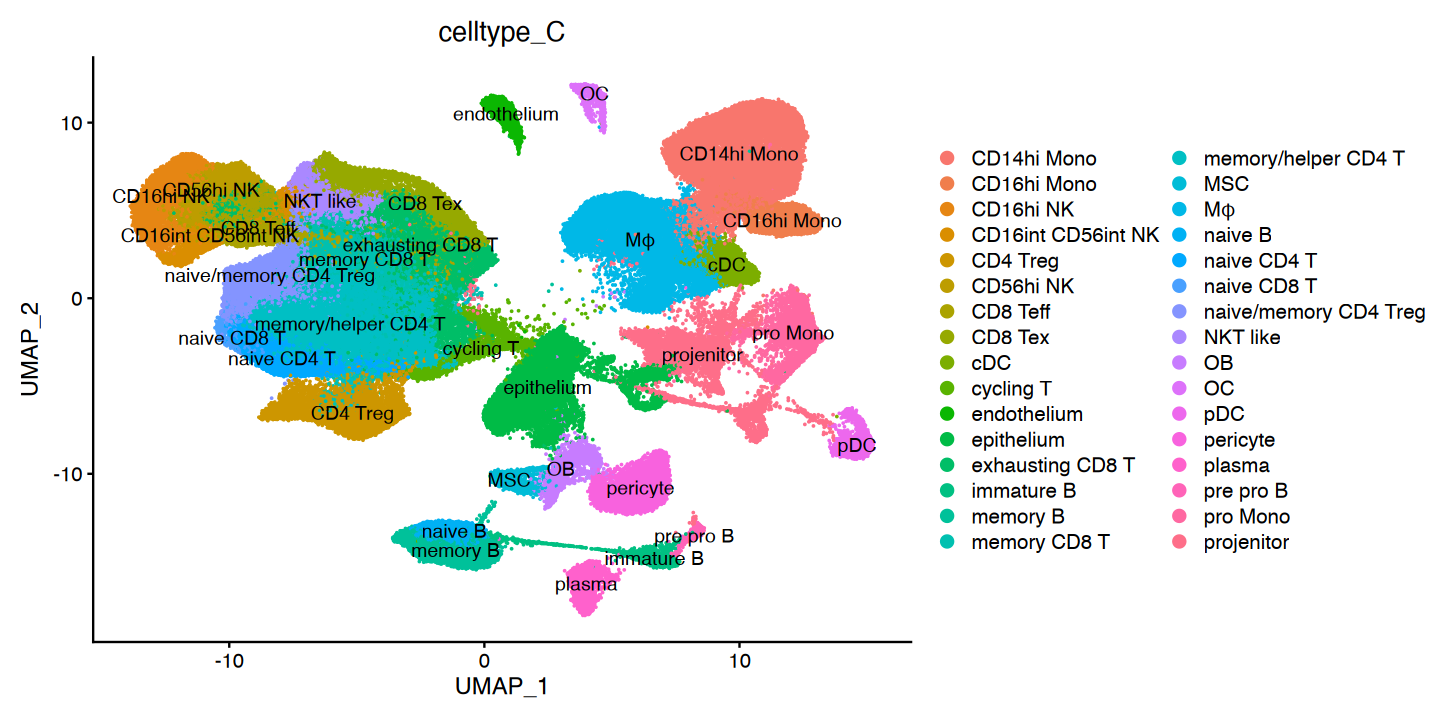

In [4]:
# Plot annotation from the published papaer doi: https://doi.org/10.1101/2024.05.07.593027
fig_size (6,12)
DimPlot(HoBM, 
        group.by = "celltype_C", 
        label = TRUE, 
        raster=FALSE)

## Figure S7

In [ ]:
# Calculate the cell numbers (frequencies) instead of proportions
cell_numbers <- table(HoBM$cancer.id, HoBM$cancer)
cell_numbers <- as.data.frame(cell_numbers)
mycolors2<-c("#2FA12E","#418abd","#F97F10","#956ABE","#34BECF","#E67D7E","#BA9994")
library(ggplot2)

# Create the plot with cell numbers
ggplot(cell_numbers, aes(y = Var1, x = Freq, fill = Var2)) +
  theme_bw(base_size = 18) +
  geom_col(position = "stack", width = 0.6) +  # Stack to show cell numbers
  xlab("Cell Number") +  # Change label to reflect cell numbers
  ylab("Cluster") +
  theme(legend.title = element_blank())+
  scale_fill_manual(values = mycolors2)


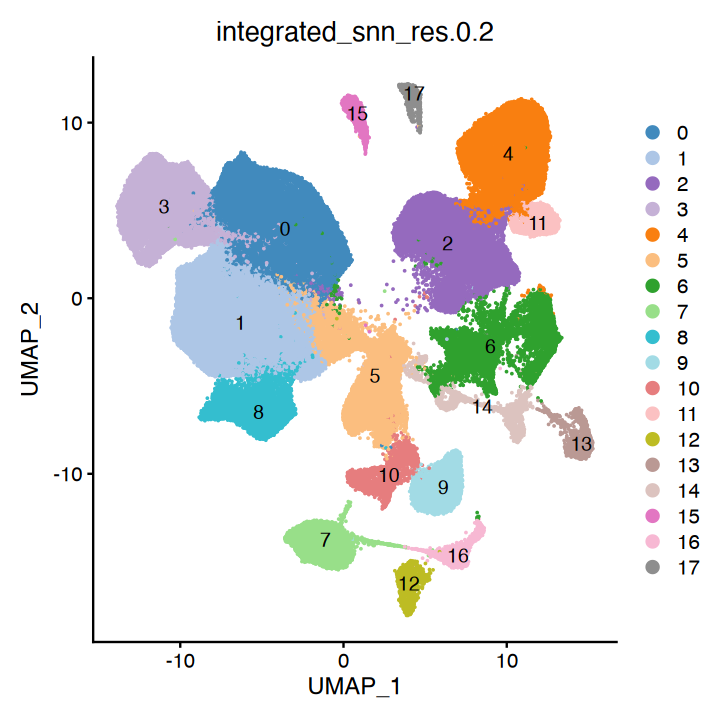

In [5]:
# Plot tumor cell marker genes in all the human cells
fig_size (6,6)
DimPlot(HoBM, 
        group.by = "integrated_snn_res.0.2", 
        cols = mycolors, 
        label = TRUE, 
        raster=FALSE) 

In [7]:
# Calculate Macrophage_c sigature score
MacC_signature <- list(c("VCAM1","CCR3","CD163","C1QA","C1QB","C1QC",
                         "CD5L","ITGAD","MRC1","MAF","HMOX1","SLC40A1"))
HoBM <- AddModuleScore(object = HoBM, 
                       features = MacC_signature, 
                       name = "MacC_signature")

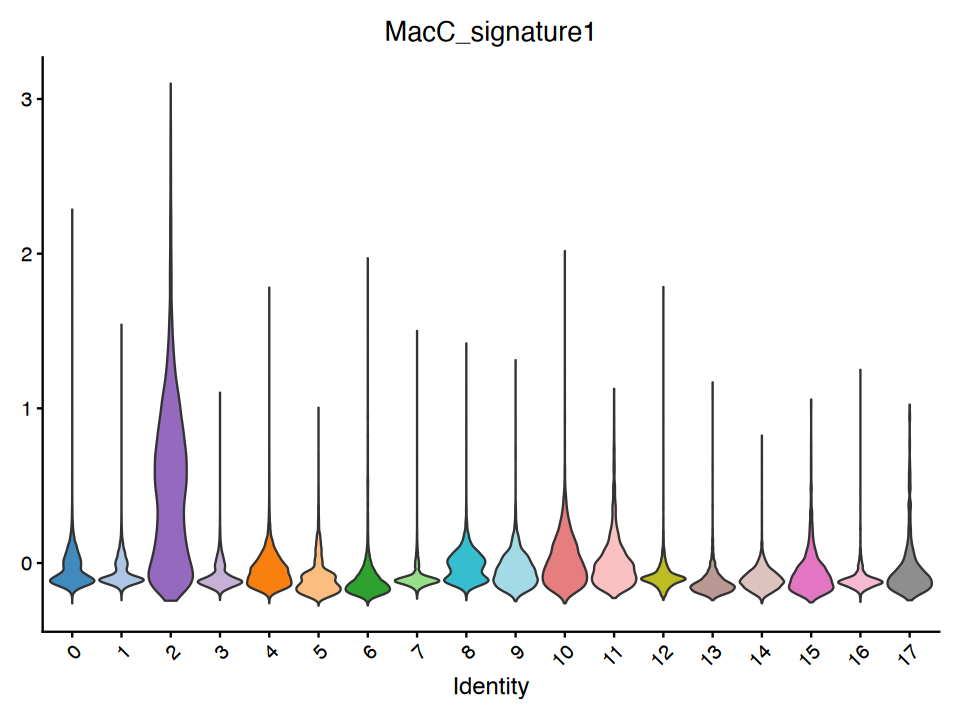

In [10]:
# Plot mouse Macrophage_c sigature score and CD68 in all the human cells
fig_size (6,8)
suppressMessages({
    VlnPlot(HoBM, features = "MacC_signature1",
            group.by = "integrated_snn_res.0.2", 
            pt.size =0, 
            cols = mycolors) + 
    NoLegend()
})

In [11]:
# subset myeloid (monocyte/macrophages)
Idents(HoBM) <-"integrated_snn_res.0.2"
myeloid <-subset(x = HoBM, 
                 idents = c("2","4","11"))

## Figure 7 macrophages

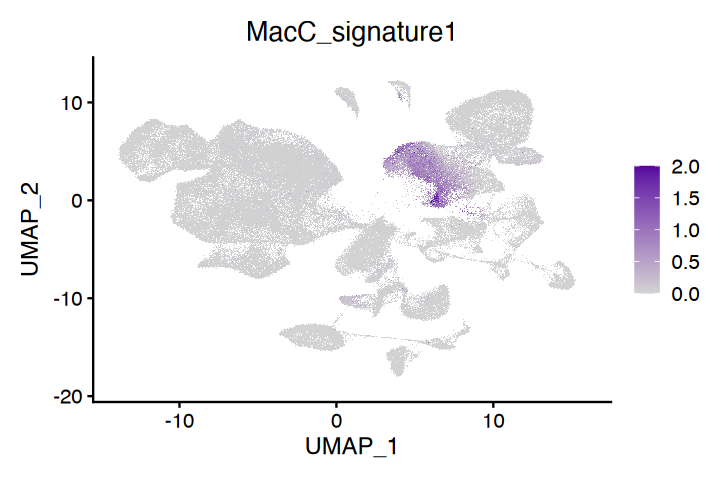

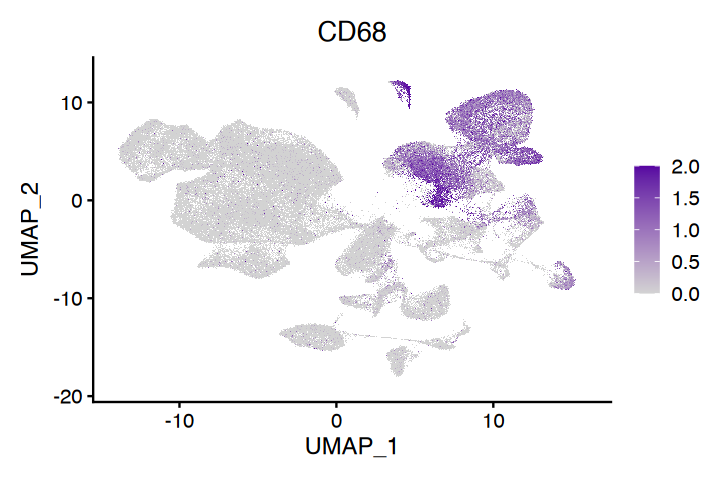

In [15]:
# Plot mouse Macrophage_c sigature score and CD68 in all the human cells
fig_size (4,6)
suppressMessages({
    FeaturePlot(HoBM, 
                features = "MacC_signature1", 
                order = T,
                cols=c("lightgrey","#5703a1"),
                pt.size = 1, 
                min.cutoff = 0, 
                max.cutoff = 2)
})
fig_size (4,6)
suppressMessages({
    FeaturePlot(HoBM, 
                features = "CD68", 
                order = T,
                cols=c("lightgrey","#5703a1"),
                pt.size = 1, 
                min.cutoff = 0, 
                max.cutoff = 2)
})

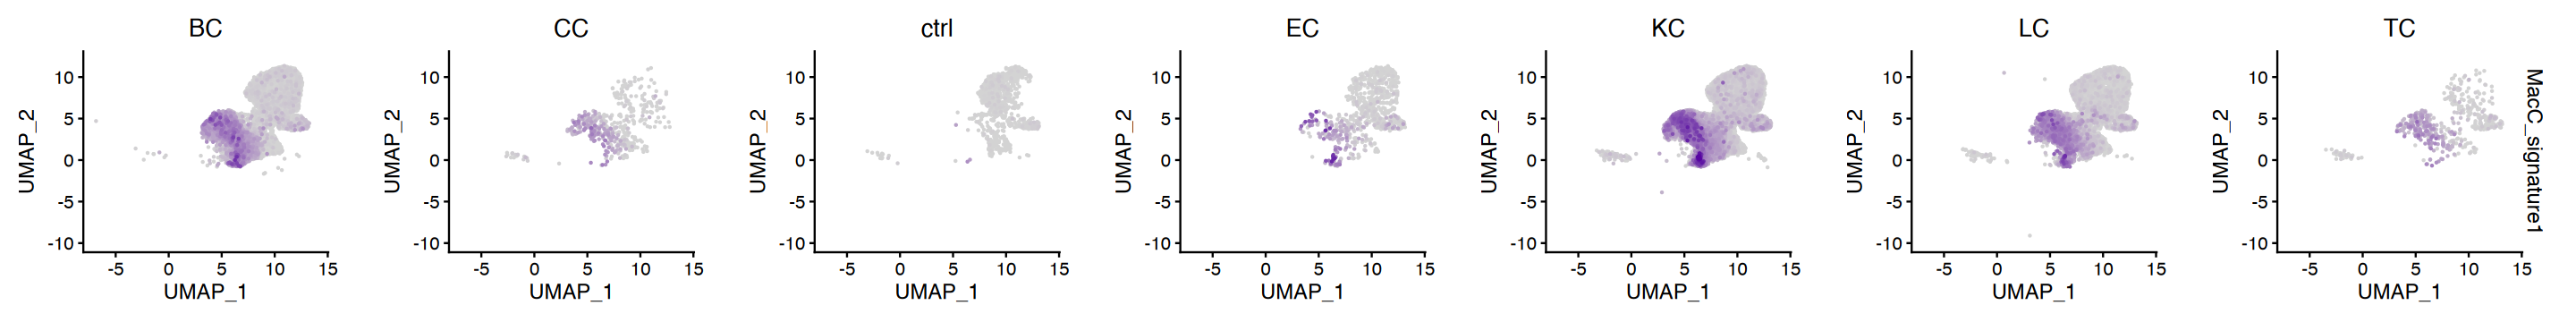

In [16]:
# Plot mouse Macrophage_c sigature score in human monocyte/macrophages_split by cancer type
fig_size (3,24)
    FeaturePlot(myeloid, 
                features = "MacC_signature1", 
                split.by = "cancer", 
                pt.size = 0.2, 
                order = T,
                cols=c("lightgrey","#5703a1"),
                min.cutoff = 0, 
                max.cutoff = 3)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



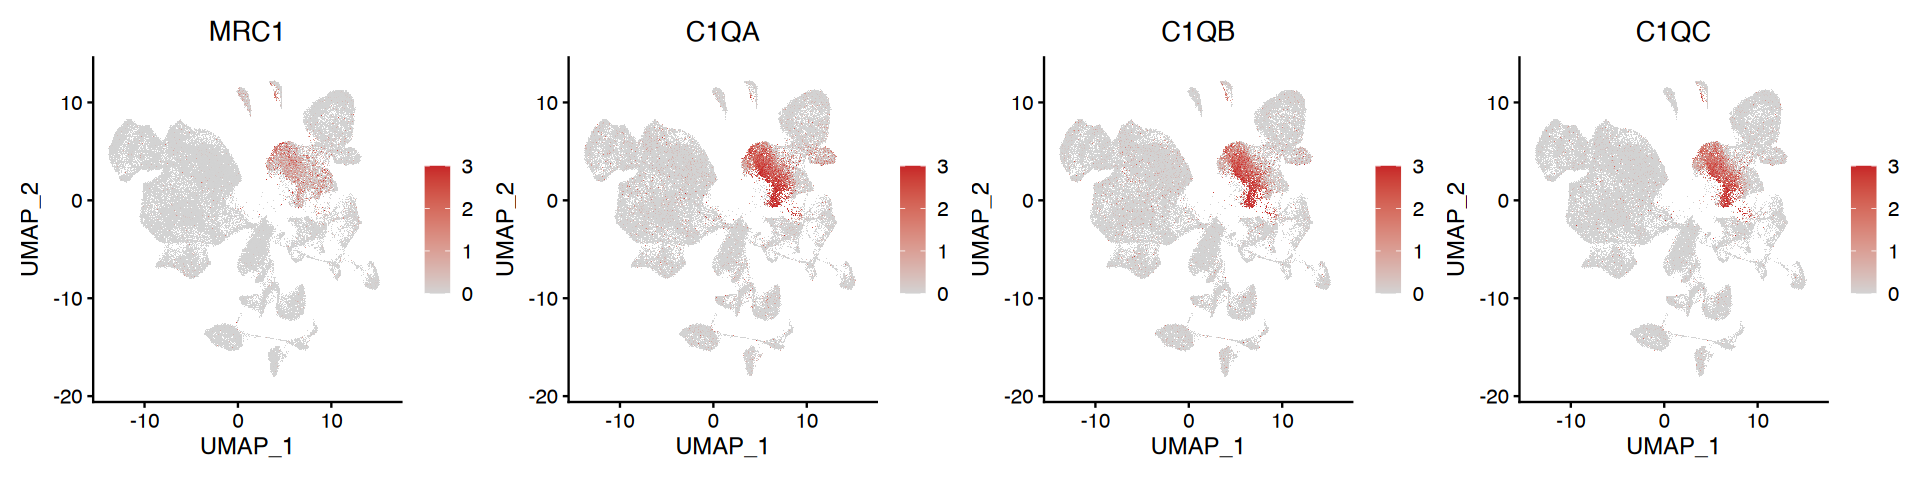

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



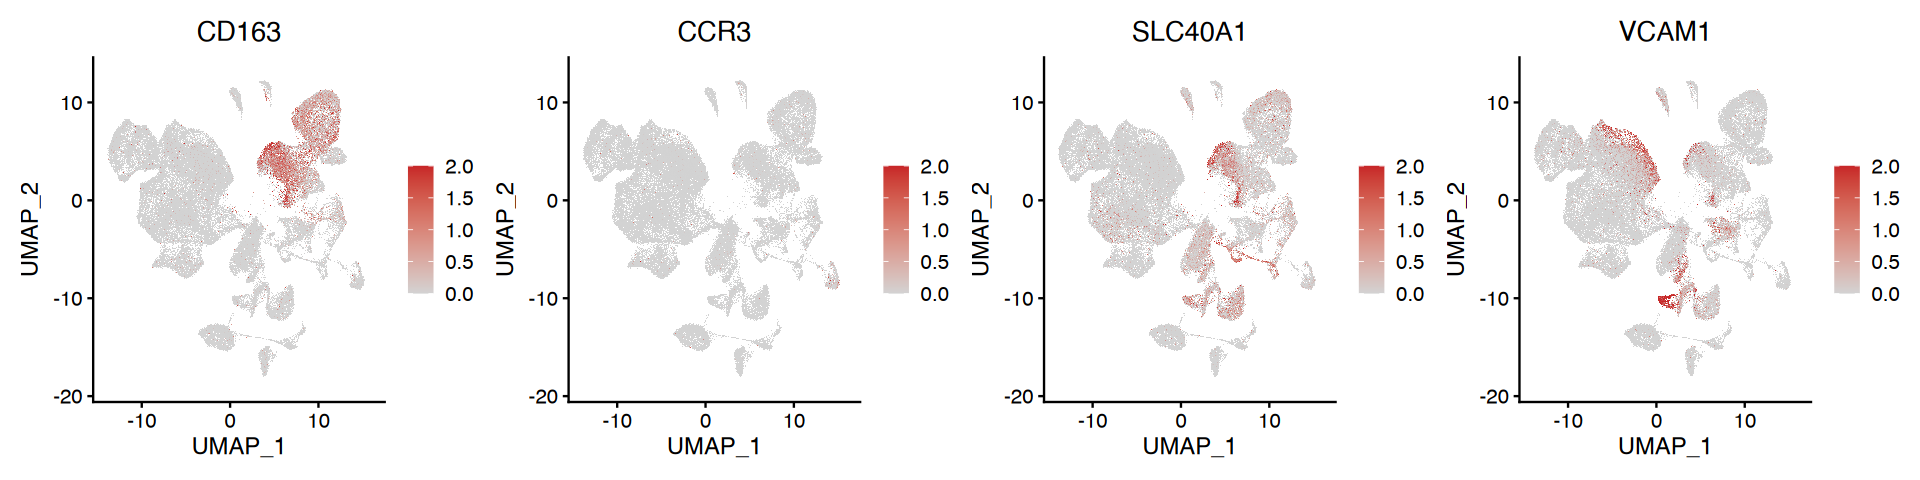

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



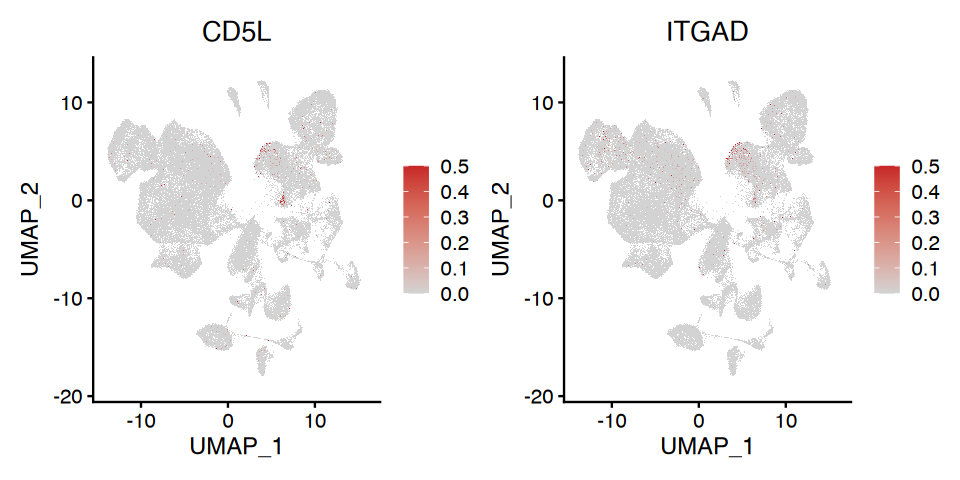

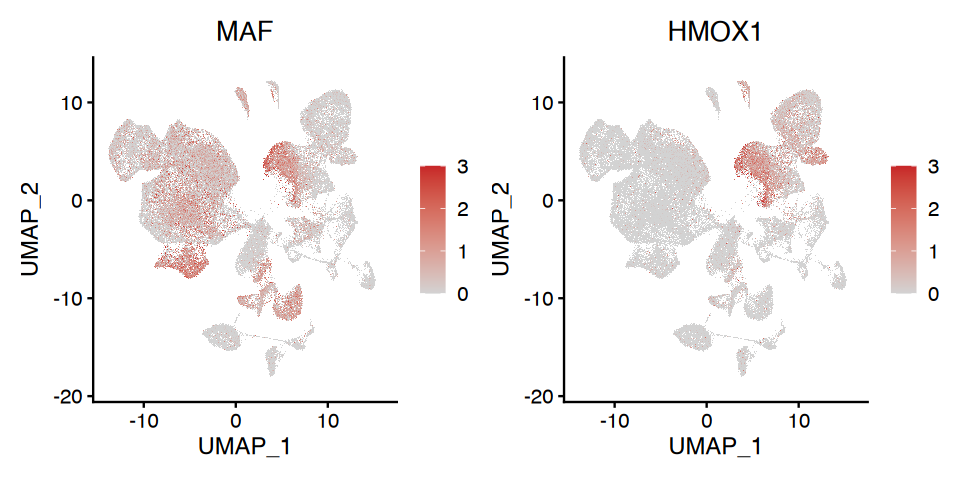

In [17]:
# Plot mouse Macrophage_c sigature genes in all the human cells
DefaultAssay(HoBM) <- "RNA"
fig_size (4,16)
FeaturePlot(HoBM, 
            features = c("MRC1","C1QA","C1QB", "C1QC"), 
            order = T,cols=c("lightgrey","#c72628"),
            pt.size = 1, 
            min.cutoff = 0, 
            max.cutoff = 3,
            ncol = 4)
FeaturePlot(HoBM, 
            features = c("CD163","CCR3","SLC40A1","VCAM1"), 
            order = T,
            cols=c("lightgrey","#c72628"),
            pt.size = 1, 
            min.cutoff = 0, 
            max.cutoff = 2, 
            ncol = 4)
fig_size (4,8)
FeaturePlot(HoBM, 
            features = c("CD5L","ITGAD"), 
            order = T,
            cols=c("lightgrey","#c72628"),
            pt.size = 1, 
            min.cutoff = 0, 
            max.cutoff = 0.5,
            ncol = 2)
FeaturePlot(HoBM, 
            features = c("MAF","HMOX1"), 
            order = T,cols=c("lightgrey","#c72628"),
            pt.size = 1, 
            min.cutoff = 0, 
            max.cutoff = 3,
            ncol = 2)

## Figure 7 tumor cells

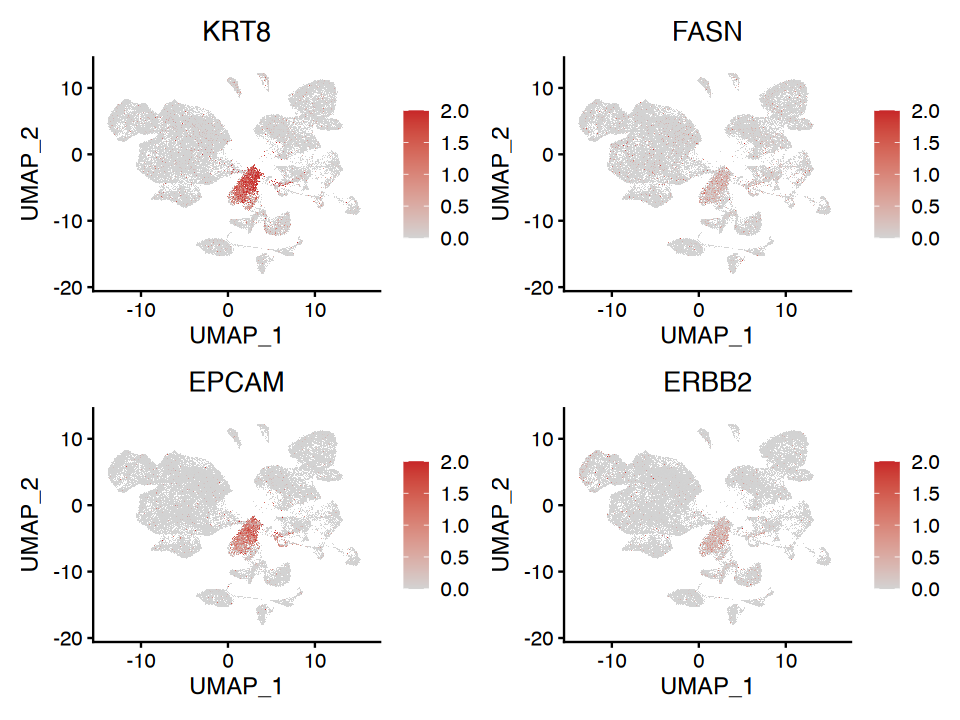

In [37]:
# Plot tumor cell marker genes in all the human cells 
fig_size (6,8)
suppressMessages({FeaturePlot(HoBM, 
            features = c("KRT8","FASN","EPCAM","ERBB2"), 
            order = T,
            cols=c("lightgrey","#c72628"),
            pt.size = 1, 
            min.cutoff = 0, 
            max.cutoff = 2)
            })

In [4]:
# Subset tumor cells
Idents(HoBM) <-"integrated_snn_res.0.2"
epith <-subset(x = HoBM, 
               idents = c("5"))
epith <- FindNeighbors(epith, 
                       graph.name = "test", 
                       dims = 1:10)
epith <- FindClusters(epith, 
                      graph.name = "test", 
                      resolution = 0.5, 
                      algorithm = 1, 
                      verbose = TRUE)

Computing nearest neighbor graph

Computing SNN

Only one graph name supplied, storing nearest-neighbor graph only



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13123
Number of edges: 122253

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8379
Number of communities: 10
Elapsed time: 0 seconds


3 singletons identified. 7 final clusters.



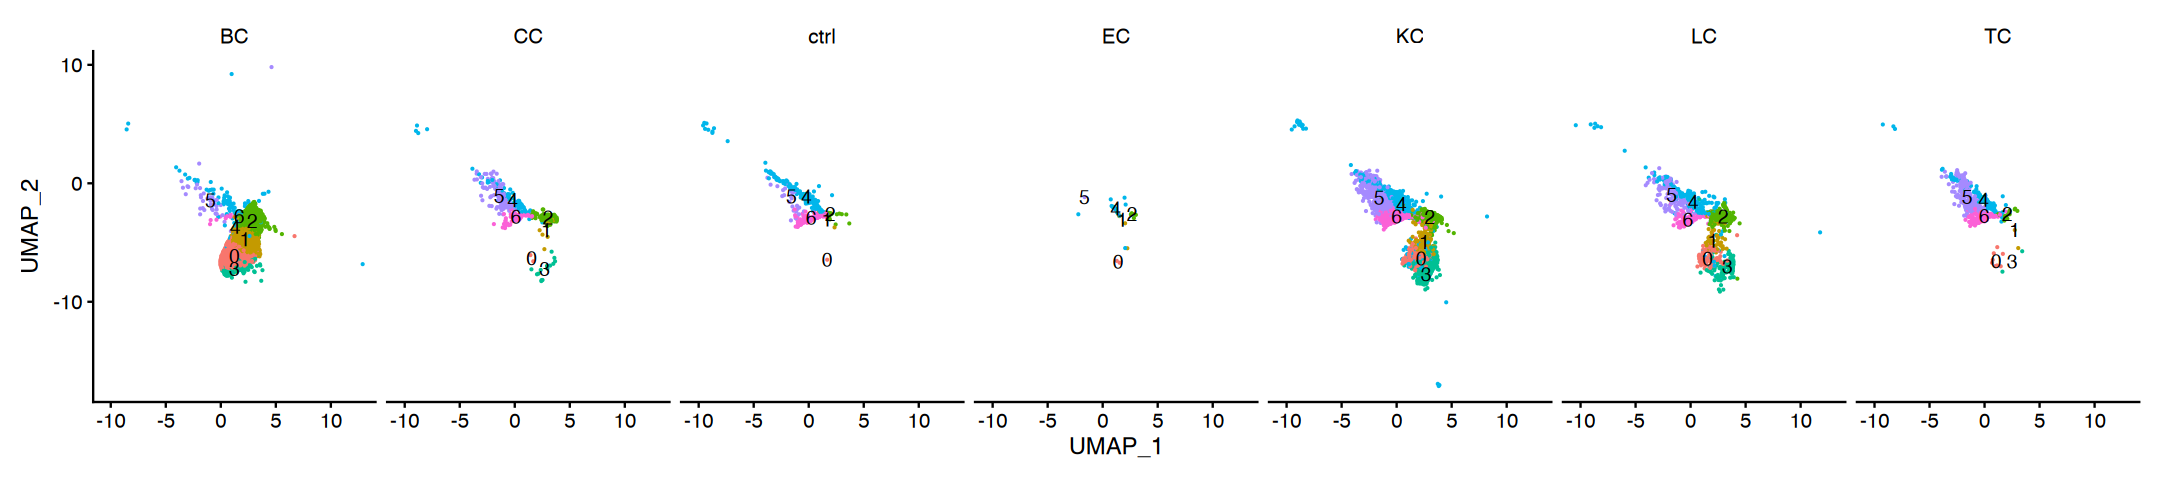

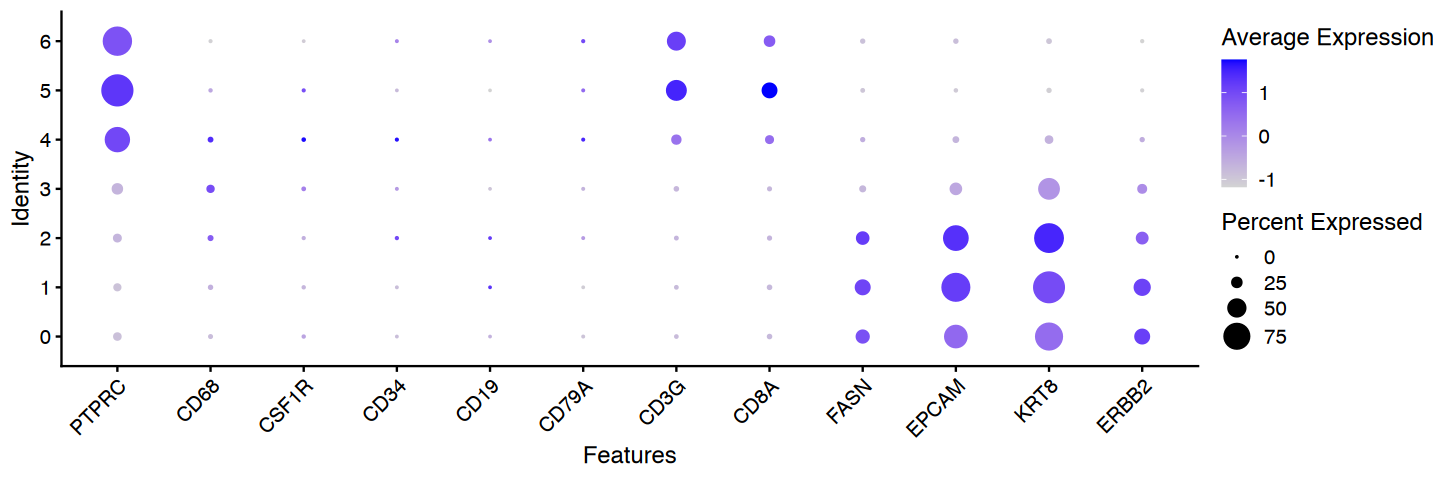

In [5]:
fig_size (4,18)
DimPlot(epith, 
        split.by = "cancer",  
        label =TRUE) + 
NoLegend()

fig_size (4,12)
DotPlot(epith, 
        features = c("PTPRC","CD68", "CSF1R", "CD34","CD19","CD79A","CD3G","CD8A", #immune cell markers
                     "FASN","EPCAM","KRT8","ERBB2"), #tumor cell markers
        dot.scale = 8) +
RotatedAxis()

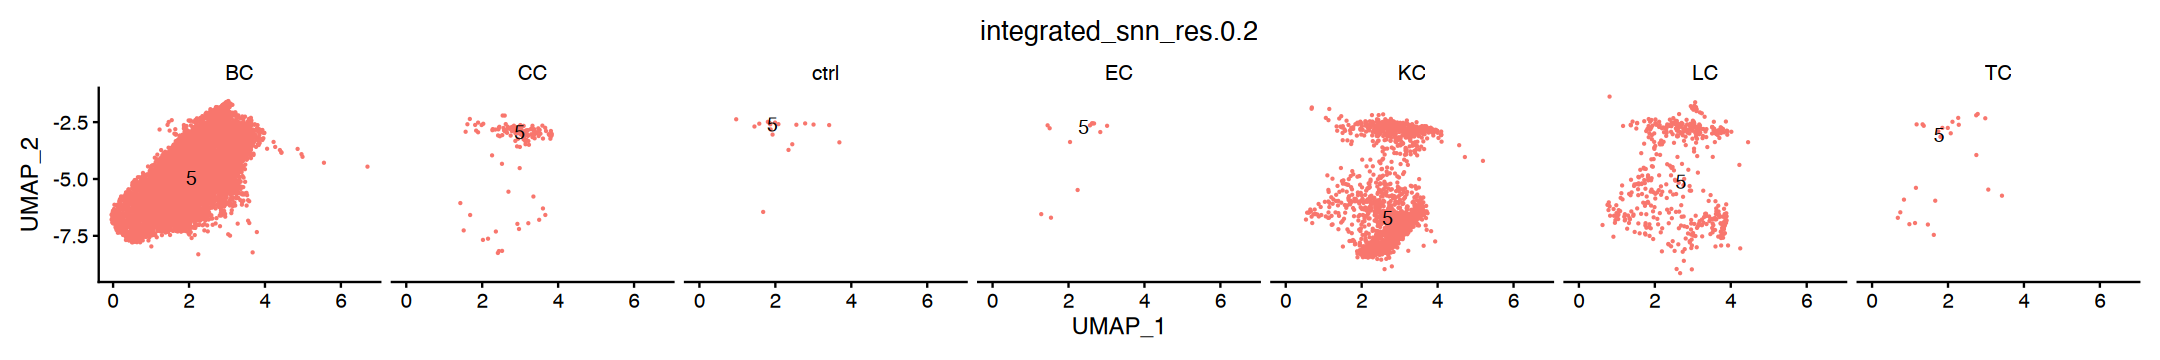

In [6]:
# remove subclaster 4,5,6 from tumor subsets, as they look like T cells and mostly are from healthy contrl
epithelium <-subset(x = epith, 
                    idents = c("0","1","2","3"))
fig_size (3,18)
DimPlot(epithelium, 
        split.by = "cancer", 
        label =TRUE,
        group.by = "integrated_snn_res.0.2" ) + 
NoLegend()

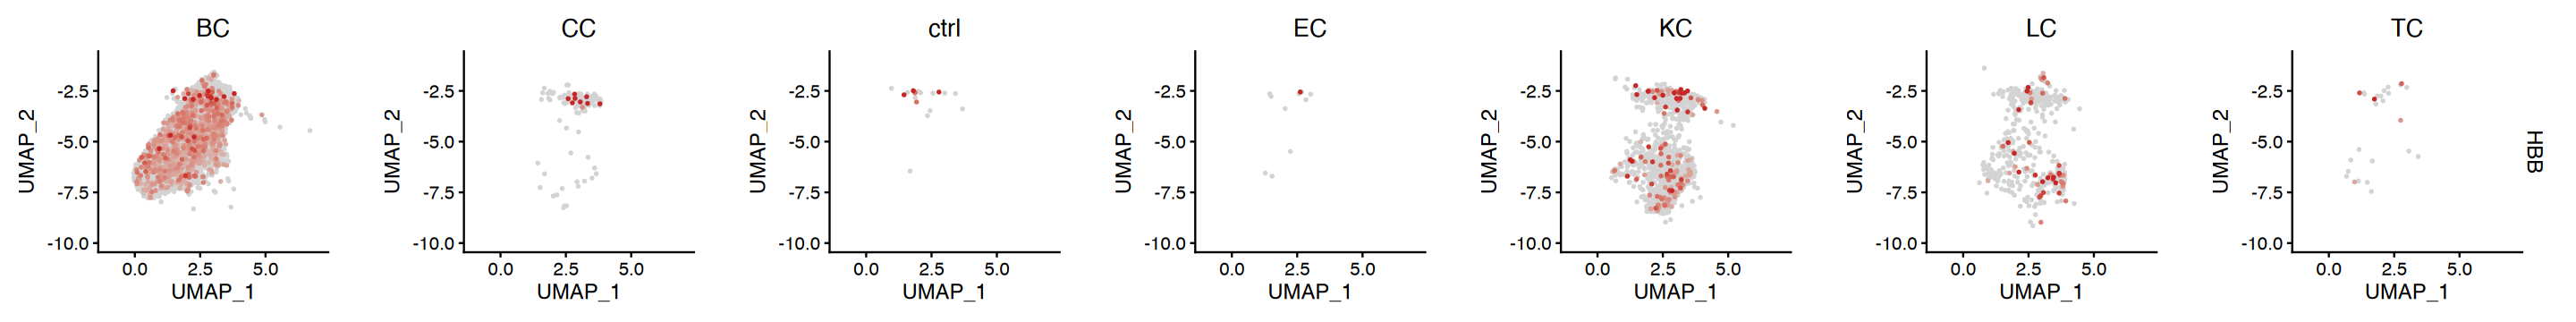

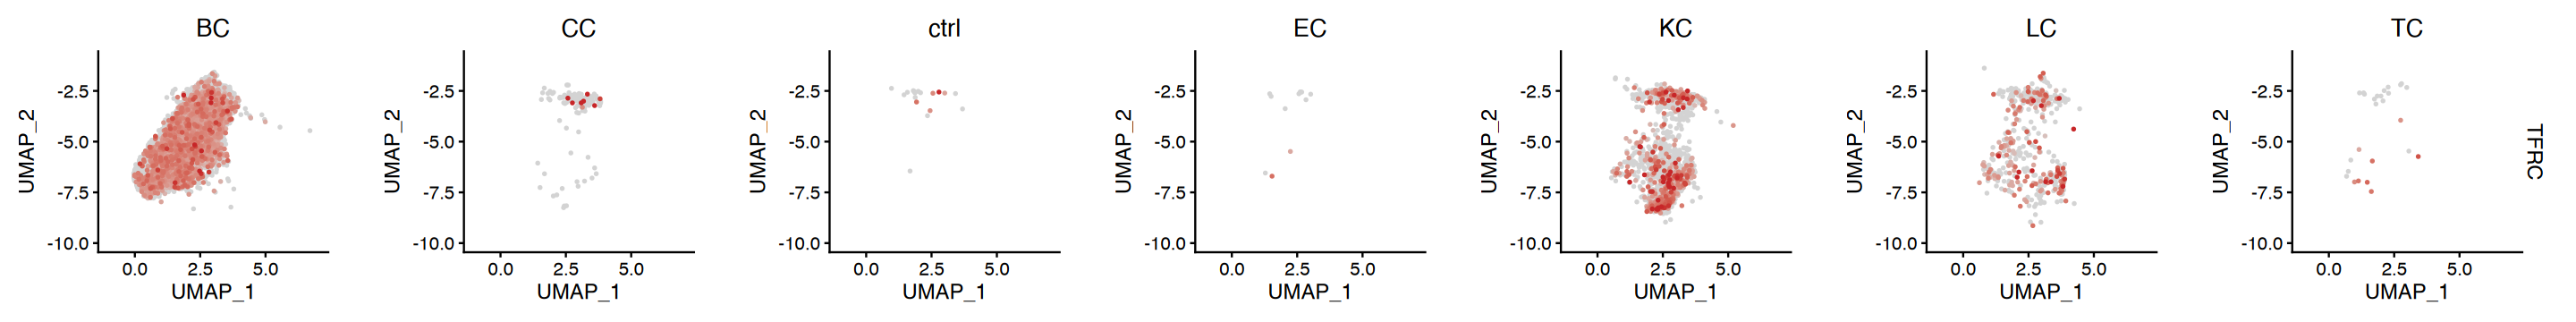

In [9]:
fig_size (3,24)
FeaturePlot(epithelium, 
            feature = "HBB",
            split.by = "cancer", 
            pt.size = 0.5,
            min.cutoff = 0, 
            max.cutoff = 2,
            order = T,
            cols=c("lightgrey","#c72628"))

FeaturePlot(epithelium, 
            feature = "TFRC",
            split.by = "cancer", 
            pt.size = 0.5,
            min.cutoff = 0, 
            max.cutoff = 2, 
            order = T,
            cols=c("lightgrey","#c72628"))